In [2]:
import pandas as pd
from ast import literal_eval
from collections import Counter
import numpy as np 
from typing import Dict, List
def convert_string_to_ngrams_list (chords_string, ngram = 4):
    """
    converts the list of chords to list of ngrams, each ngram is one list
    """
    chords = literal_eval(chords_string)

    temp=zip(*[chords[i:] for i in range(0,ngram)])
    ans=[' '.join(ngram) for ngram in temp]

    return ans
all_genres_en = pd.read_csv('data/all_genres_en.csv').drop(columns='Unnamed: 0')
all_genres_en

,name,author,link,lyrics,chords,genre,actual_name,language
0,As Long As The Grass Shall Grow,Johnny Cash,https://tabs.ultimate-guitar.com/tab/johnny-ca...,"As long, As the moon shall rise, As ...","['A', 'E', 'A', 'A', 'E', 'A', 'D', 'D', 'A', ...",Country,As Long As The Grass Shall Grow,en
1,Delias Gone (ver 4),Johnny Cash,https://tabs.ultimate-guitar.com/tab/johnny-ca...,"Delia, oh, Delia Delia all my life\r\nIf I had...","['A', 'D', 'A', 'A7', 'D', 'B7', 'E', 'A', 'D'...",Country,Delias Gone,en
2,Mean Eyed Cat,Johnny Cash,https://tabs.ultimate-guitar.com/tab/johnny-ca...,I gave my woman half my money at the general s...,"['E', 'B7', 'E', 'A7', 'B7', 'E', 'E', 'B7', '...",Country,Mean Eyed Cat,en
3,I Couldnt Keep From Crying,Johnny Cash,https://tabs.ultimate-guitar.com/tab/johnny-ca...,"I SAW YOU WALKING BY HIS SIDE,\r\nHEARD YOU W...","['A', 'A7', 'D', 'A', 'E7', 'A', 'A7', 'D', 'A...",Country,I Couldnt Keep From Crying,en
4,It Aint Me Babe (ver 3),Johnny Cash,https://tabs.ultimate-guitar.com/tab/johnny-ca...,Go 'way from my window leave at your own chose...,"['A', 'Bm', 'A', 'E', 'A', 'A', 'Bm', 'A', 'E'...",Country,It Aint Me Babe,en
...,...,...,...,...,...,...,...,...
23570,5150,Machine Gun Kelly,https://tabs.ultimate-guitar.com/tab/machine-g...,Bruises don't heal overnight\r\nI'm a few sips...,"['C', 'G', 'D', 'Em', 'C', 'G', 'D', 'Em', 'C'...",Rock,5150,en
23571,Fake Love Dont Last,Machine Gun Kelly,https://tabs.ultimate-guitar.com/tab/machine-g...,"I watched a movie scene, got déjà vu\r\n'Cause...","['Em', 'G', 'B', 'C', 'Em', 'G', 'B', 'C', 'Em...",Rock,Fake Love Dont Last,en
23572,Sid And Nancy,Machine Gun Kelly,https://tabs.ultimate-guitar.com/tab/machine-g...,I knew a girl who'd wear my t-shirts when she ...,"['D', 'F#m', 'E', 'D', 'F#m', 'E', 'D', 'F#m',...",Rock,Sid And Nancy,en
23573,Forever,Stereophonics,https://tabs.ultimate-guitar.com/tab/stereopho...,Sun beats down on my mind on a friday morning...,"['G', 'C', 'G', 'C', 'G', 'C', 'G', 'C', 'D', ...",Rock,Forever,en


In [37]:
all_genres_en['ngrams'] = all_genres_en['chords'].apply(lambda x: convert_string_to_ngrams_list(x,4))
all_genres_en['ngrams'] = all_genres_en['ngrams'].apply(lambda x:  x if len(x) > 0 else np.NaN)
all_genres_en = all_genres_en.dropna(subset=["ngrams"])
all_genres_en["best_ngram"] =  all_genres_en['ngrams'].apply( lambda x:  tuple(list(Counter(x).most_common(1))[0][0].split()))
len(all_genres_en["best_ngram"].drop_duplicates())

9364

In [28]:
all_chords = []
for chord in all_genres_en["chords"]:
    l = literal_eval(chord)
    all_chords += l
# df["chords"]
counter = Counter(all_chords)
max_value = counter.most_common(1)[0][1]
chord_rarity = {k:(1-(1+i)/max_value) for k, i in counter.items()}
# chord_rarity
def progression_rarity(progression: List[str], chord_rarity: Dict[str, float]):
    rarity = 1
    for chord in progression:
        rarity *= chord_rarity[chord]
    return rarity 


<AxesSubplot:ylabel='Frequency'>

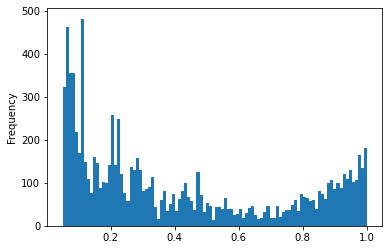

In [36]:
all_genres_en["rarity"] = all_genres_en["best_ngram"].apply(lambda x: progression_rarity(x,chord_rarity))

# all_genres_en[all_genres_en["rarity"] > 0.99].plot(kind = "hist")
# all_genres_en[all_genres_en["rarity"] < 0.1]
all_genres_en[all_genres_en["rarity"] >0.05]["rarity"].plot(kind = "hist", bins = 100)

